In [1]:
import os
import torch
import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix
from utils.graph import draw_confusion_matrix
from utils.configs import config
from utils.data_loader import get_test_loader
from utils.model_list import xception
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from openmax.openmax import OpenMax
from openmax.openmax_utils import get_int_labels

In [2]:
net = xception(config=config)
net.load_state_dict(torch.load(f'model_weights/fold_{config.fold}/model.pth'))

Using Xception with 16 classes
Loading pretrained weights...


<All keys matched successfully>

In [3]:
test_dl = get_test_loader(config)

In [4]:
# Get true labels
y_true = []

for data in test_dl:
    y = data[1].numpy()
    for label in y:
        y_true.append(label)

y_true = np.asarray(y_true)
y_true = get_int_labels(y_true)

In [5]:
# OpenMax model
openmax = OpenMax(net, config.fold)

In [6]:
y_pred = openmax.predict(test_dl)

In [7]:
f1_score(y_true, y_pred, average='macro')

0.7170872848605834

In [8]:
cm = confusion_matrix(y_true, y_pred, normalize='true')
cm = np.round(cm, 2)

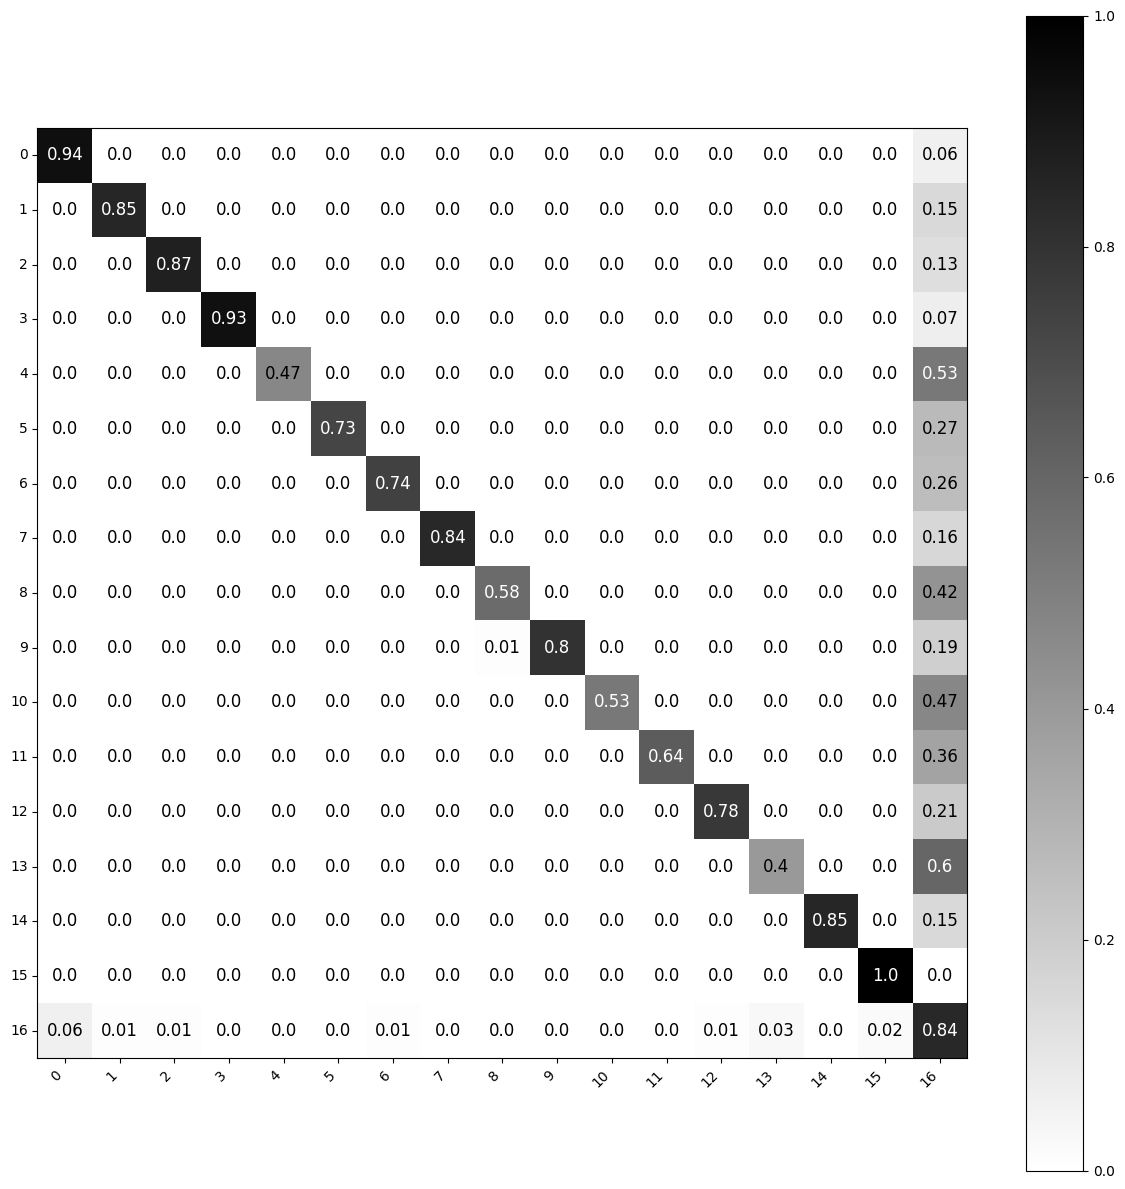

In [9]:
draw_confusion_matrix(cm, range(17))